<a href="https://colab.research.google.com/github/Kuro2509/IA_ASCS/blob/main/tensorImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#instalar python 3.8
!sudo apt-get update -y
!sudo apt-get install python3.8 python3.8-dev python3.8-venv -y
# crear un entorno virtual con python
!python3.8 -m venv tfjs-venv
# activar el entorno virtual
!source tfjs-venv/bin/activate

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [4]:
#paso 2
!tfjs-venv/bin/pip install --upgrade pip
!tfjs-venv/bin/pip install tensorflow==2.8 tensorflowjs_converter

!pip install tensorflow-decision-forests --upgrade

!pip install tensorflowjs


  Using cached tensorflow-2.8.0-cp38-cp38-manylinux2010_x86_64.whl.metadata (2.9 kB)
ERROR: Could not find a version that satisfies the requirement tensorflowjs_converter (from versions: none)
ERROR: No matching distribution found for tensorflowjs_converter


In [5]:
!pip install tensorflow-decision-forests --upgrade

In [6]:
#paso 3
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

In [7]:
#paso 4
import tensorflow as tf
import tensorflow_datasets as tfds

In [8]:
# paso 5 Descargar set de datos de fashion MNIST de zalando
datos,metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.P87FFG_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.P87FFG_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [9]:
#paso 6
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir=PosixGPath('/tmp/tmpjho2o2jutfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao an

In [10]:
#paso 7 obtenemos en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [11]:
#paso 8  etiquetas de las 10 categorias posibles
nombres_clases = metadatos.features['label'].names

In [12]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [13]:
#Funcion de normalizacion para los datos (Pasar de 0-255 a 0-1)
#Hace que la red aprenda mejor y mas rapido
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar lso datos de entrenamiento
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#agregar a cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

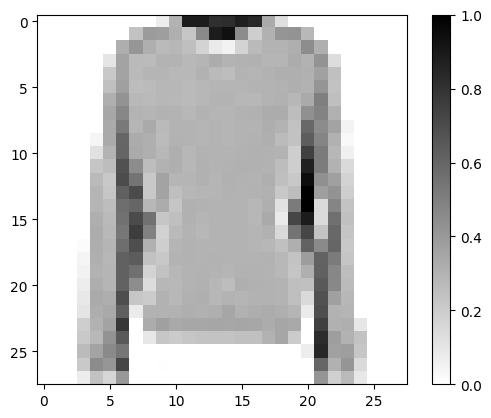

In [14]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28))

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

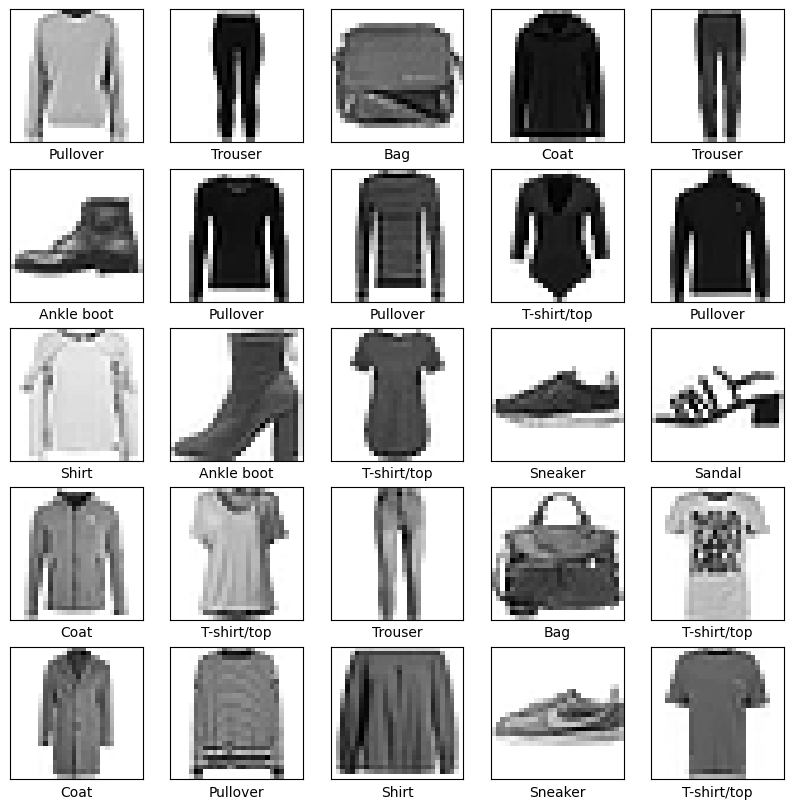

In [15]:
#Dibujar mas
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [16]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - blanco y negro
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [17]:
#compilar modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [18]:
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [19]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [20]:
TAMANO_LOTE = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

Epoch 1/5
1875/1875 [==============================] - 11s 2ms/step - loss: 0.5232 - accuracy: 0.8165
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3895 - accuracy: 0.8577
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3524 - accuracy: 0.8712
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3277 - accuracy: 0.8808
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3093 - accuracy: 0.8860


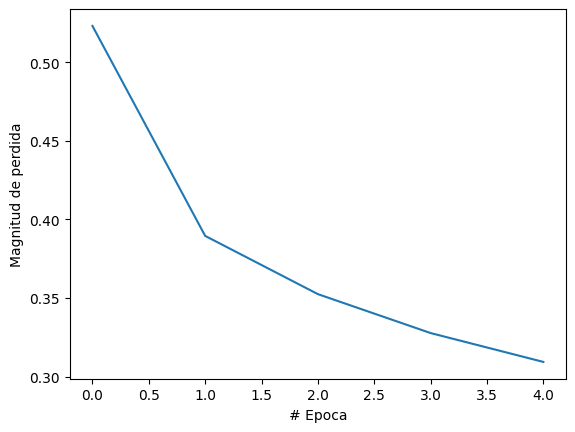

In [21]:
import math
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/TAMANO_LOTE))
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [22]:
import numpy as np
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_pruebas = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_pruebas)

def graficar_imagen(i,arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = "blue"
  else:
    color = "red"

##--------------------------------------------------------------

  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                       100*np.max(arr_predicciones),
                                       nombres_clases[etiqueta_real]),
                                       color=color)

  def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color="#777777")
    plt.ylim([0,1])
    etiqueta_prediccion = np.argmax(arr_predicciones)

##--------------------------------------------------------------

    grafica[etiqueta_prediccion].set_color("red")
    grafica[etiqueta_real].set_color("blue")


    filas =5
    columnas = 3
    num_imagenes = filas*columnas
    plt.figure(figsize=(2*2*columnas, 2*filas))
    for i in range(num_imagenes):
      plt.subplot(filas, 2*columnas, 2*i+1)
      graficar_imagen(i, predicciones, etiquetas_prueba,imagenes_prueb)
      plt.subplot(filas, 2*columnas, 2*i+2)
      graficar_valor_arreglo(i, predicciones, etiquetas_prueba)


1/1 [==============================] - 0s 100ms/step


In [23]:
imagen = imagenes_pruebas[4]
imagen = np.array([imagen])
predicciones_single = modelo.predict(imagen)

print("prediccion:"+ nombres_clases[np.argmax(predicciones_single[0])])


1/1 [==============================] - 0s 73ms/step
prediccion:Sandal


In [24]:
!mkdir clasificacion

modelo.save('clasificacion.h5')

!tensorflowjs_converter --input_format keras clasificacion.h5 clasificacion

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2024-11-11 00:37:36.073004: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731285456.098292    4043 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731285456.105519    4043 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
